In [61]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from matplotlib.image import imread
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [62]:
n_colors = [64,32,16,8,4,2]
gnsh = imread("gnsh.jpg")
gnsh = np.array(gnsh, dtype=np.float64) / 255

In [63]:
w, h, d = original_shape = tuple(gnsh.shape)
image_array = np.reshape(gnsh, (w * h, 3))
print(image_array)

[[1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 ...
 [0.81960784 0.78431373 0.56078431]
 [0.82745098 0.79215686 0.56862745]
 [0.82745098 0.79215686 0.56862745]]


In [64]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

kmeans = []
labels = []
for i in range(len(n_colors)):
    kmeans.append(KMeans(n_clusters=n_colors[i]).fit(image_array_sample))
    labels.append(kmeans[i].predict(image_array))

In [65]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

print(kmeans)

[KMeans(n_clusters=64), KMeans(n_clusters=32), KMeans(n_clusters=16), KMeans(), KMeans(n_clusters=4), KMeans(n_clusters=2)]


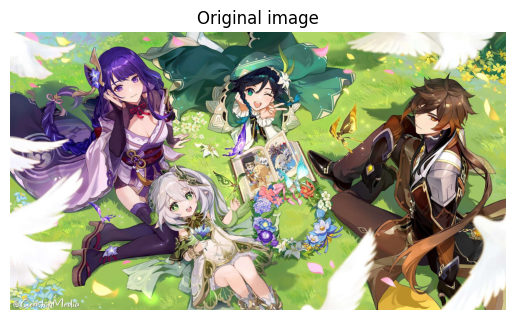

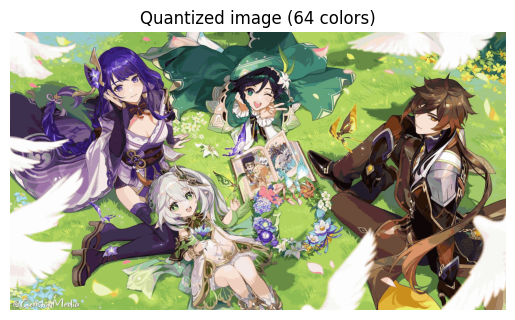

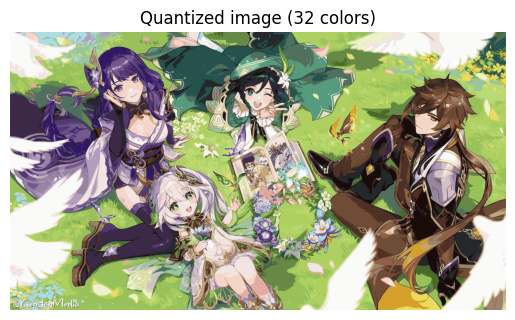

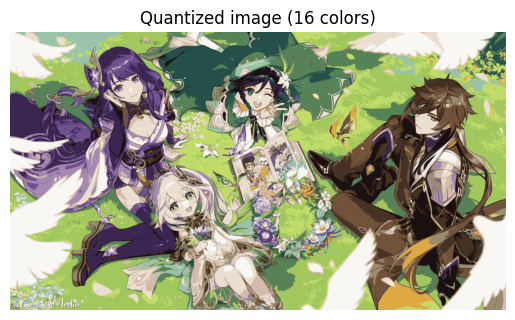

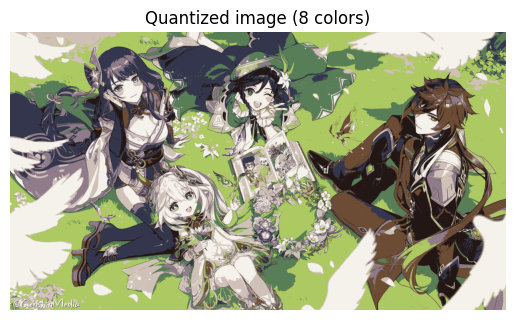

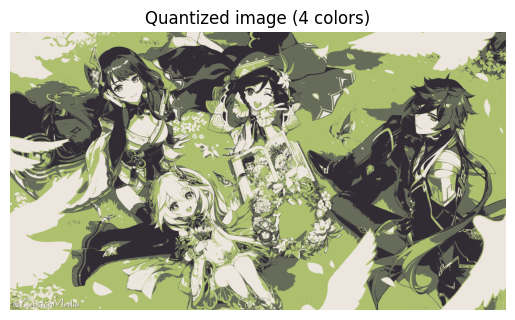

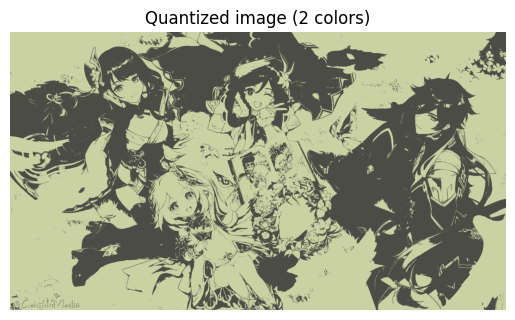

In [66]:
plt.axis("off")
plt.title("Original image")
plt.imshow(gnsh)
plt.show()

for i in range(len(n_colors)):
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[i]} colors)")
    plt.imshow(recreate_image(kmeans[i].cluster_centers_, labels[i], w, h))
    plt.show()